# DeepLearning Assessment 1 - Mathematical Symbol Classification
This notebook performs multiclass classification of handwritten mathematical symbols. The notebook outlines two classifiers namely:

* Support Vector Machine (SVM)  
* Artificial Neural Network (ANN)  

For both classifiers, the handwritten symbols will be passed in three various forms:

* The raw pixel form  
* Histogram Of Gradient (HoG) features  
* Local Binary Patterns (LBP) features.


# Data Loading

In [1]:

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import tensorflow as tf

In [2]:
import os
import cv2
#

def data_loader(Dataset_Path):
    images = []
    labels = []
    label_map = {}
    if not os.path.exists(Dataset_Path):
        raise FileNotFoundError(f"The directory {Dataset_Path} does not exist.")
    #Loop through the data directory and return each photo as a tensor and attach a class label
    for label, folder in enumerate(sorted(os.listdir(Dataset_Path))):  
        folder_path = os.path.join(Dataset_Path, folder)
        label_map[label]= folder
        #Loop through one class folder and load images as grayscale
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)

            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (64,64))
            labels.append(label)
            images.append(image)


    return images, labels, label_map



In [3]:
%cd ..

c:\Users\61422\OneDrive\Desktop\Augustus Amedume Comp Sci Degree\Augustus Amedume Year 3 Computer Science\Semester 1\Deep Learning And Convolutional Nueral Networks\DeepLearningAssignment1


In [4]:
images, labels, label_map = data_loader('data')

In [5]:
label_map[0] = "Exclamation (!)"
label_map[1] = "Left Parantheses"
label_map[2] = "Right Parenthese"
label_map[3] = "Zero"
label_map[4] = "Seven"
label_map[5] = "Nine"
label_map[6]= "Not Equal"


In [6]:
label_map

{0: 'Exclamation (!)',
 1: 'Left Parantheses',
 2: 'Right Parenthese',
 3: 'Zero',
 4: 'Seven',
 5: 'Nine',
 6: 'Not Equal',
 7: 'sin',
 8: 'sum',
 9: 'times'}

In [7]:
for id, image in enumerate(images):
    print(f"{id}, {image}")

0, [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
1, [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
2, [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
3, [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
4, [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
5, [[255 255 255 ... 255 

In [8]:
images

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

## Data Visualisation

In [9]:
import matplotlib.pyplot as plt



def visualise_few_images_per_class(img_array, labels, label_map, num_images_visualised_per_class=1,):
    #Set the size of the visualisation
    plt.figure(figsize=(10,10))
    labels = np.atleast_1d(labels)
    #get random indexes for the images in the image array based on their class value
    for classLabel, class_name in label_map.items():
        class_indices = np.where(labels == classLabel)[0]
        selected_indices = np.random.choice(class_indices,num_images_visualised_per_class,replace=False)

        for i, idx in enumerate(selected_indices):
            plt.subplot(len(label_map), num_images_visualised_per_class, classLabel * num_images_visualised_per_class + i + 1)
            plt.imshow(img_array[idx], cmap='gray')
            plt.title(class_name)
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

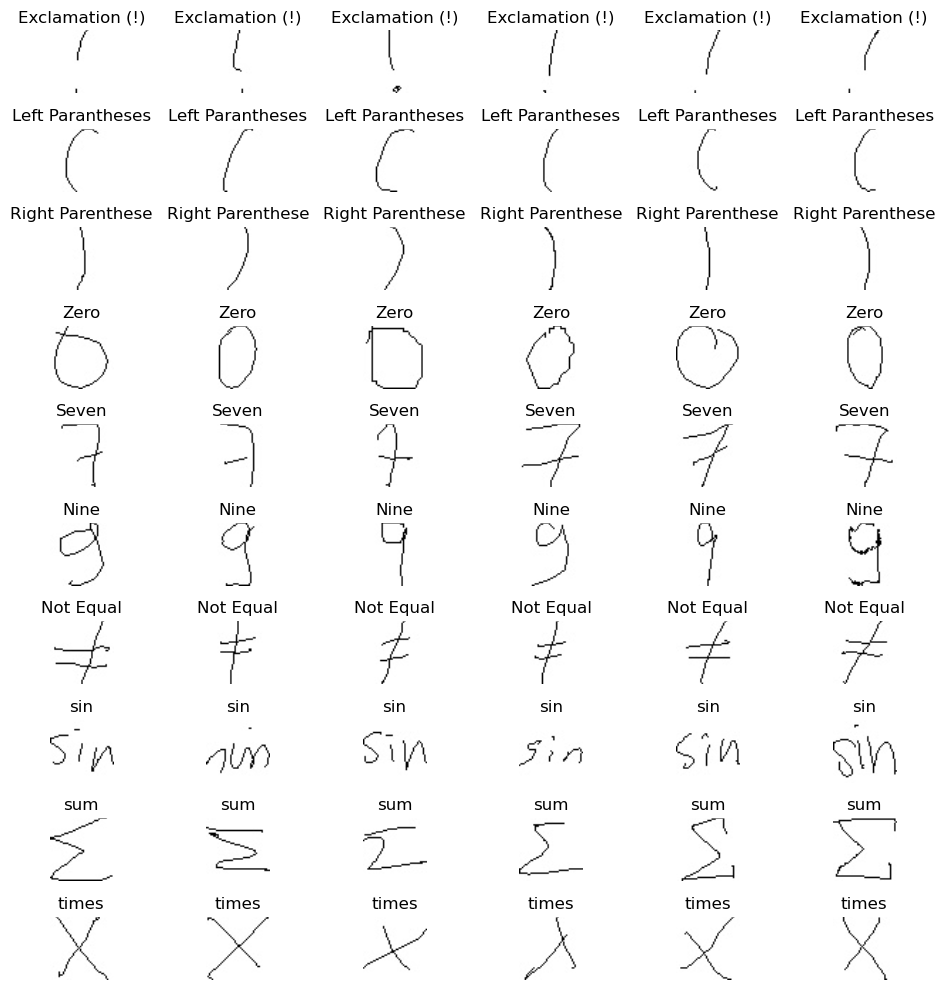

In [10]:
visualise_few_images_per_class(images, labels=labels, label_map=label_map, num_images_visualised_per_class=6)


## Data Partitioning
The dataset in split into training and testing sets. The random seed is set to 42 as per convention. For the experiment, the training data set will be will be 80 perecent of the images while the testing will be 20 perecent 

In [11]:
from sklearn.model_selection import train_test_split
import numpy as np
#Define X and y parts of the dataset
X = np.array(images)
y = np.array(labels)
test_size = 0.2
random_seed = 42

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state=random_seed)



Investigate the shape of the data and their associated labels. The X values should be in 3 dimensions while the y values should be 1

In [12]:
print("The shape of the training data is ", X_train.shape)
print("The shape of the testing data is ", X_test.shape)
print("The shape of labels for the training set is ", y_train.shape)
print("The shape of labels for the testing set is ", y_test.shape)

The shape of the training data is  (4000, 64, 64)
The shape of the testing data is  (1000, 64, 64)
The shape of labels for the training set is  (4000,)
The shape of labels for the testing set is  (1000,)


Support Vector Machine from sklearn takes in data for up to 2D arrays, Given the data is currently in 3D. The X values must be flattened accordingly 

In [13]:
X_train = X_train.reshape(4000,-1)
X_test = X_test.reshape(1000, -1)

In [14]:
print("The shape of the training data after flattening is ", X_train.shape)
print("The shape of the testing data after flattening is ", X_test.shape)

The shape of the training data after flattening is  (4000, 4096)
The shape of the testing data after flattening is  (1000, 4096)


## Suport Vector Machine(SVM)

In [34]:
import sklearn as sk
from  sklearn import svm

model = svm.SVC(kernel='rbf')
model.fit(X_train, y_train)



SVC()

In [16]:
y_pred = model.predict(X_test)


### Model Evaluation

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

print("ACCURACY is", accuracy_score(y_test, y_pred))
print("CLASSIFICATION REPORT: \n", classification_report(y_test, y_pred))

ACCURACY is 0.986
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       111
           1       0.96      0.98      0.97       105
           2       0.99      0.99      0.99       105
           3       1.00      0.99      0.99        85
           4       0.98      0.96      0.97        94
           5       0.99      0.99      0.99        98
           6       0.97      1.00      0.98        98
           7       1.00      1.00      1.00       112
           8       1.00      0.99      0.99        81
           9       1.00      1.00      1.00       111

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def visualize_report(report):
    # Extracting metrics for each class
    metrics = ['precision', 'recall', 'f1-score', 'support']
    data = {metric: [] for metric in metrics}
    labels = []

    # Include class-specific metrics
    for cls, metrics_values in report.items():
        if cls.isdigit():
            labels.append(cls)
            for metric in metrics:
                data[metric].append(metrics_values.get(metric, None))

    # Convert data to DataFrame for easy plotting
    df = pd.DataFrame(data, index=labels)

    # Creating subplots for each metric
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for ax, metric in zip(axes, metrics[:-1]): 
        sns.barplot(ax=ax, x=df.index, y=metric, data=df, hue=df.index)
        ax.set_title(f'{metric.capitalize()} by Class')
        ax.set_ylim(0, 1.1)
        ax.set_xlabel('Class')
        
    plt.tight_layout()
    plt.show()


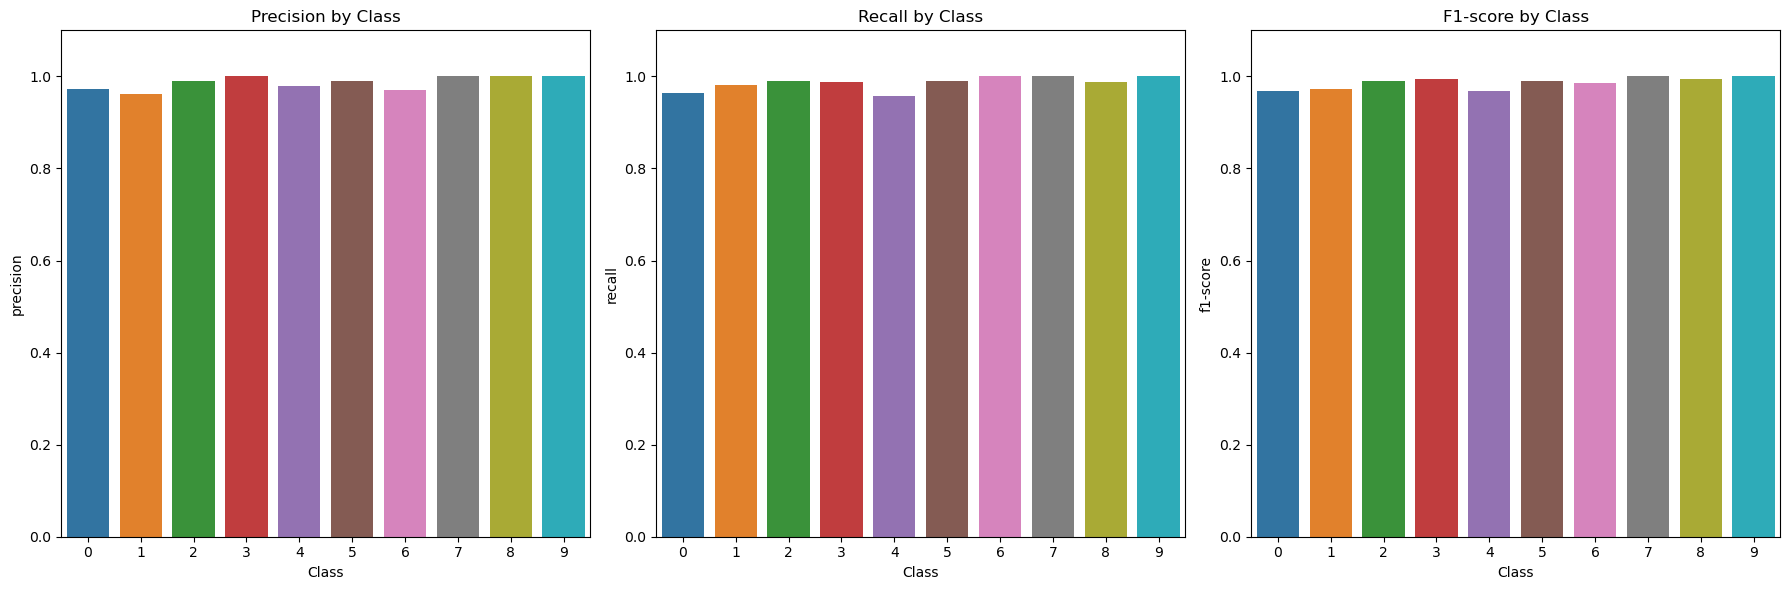

In [ ]:
visualize_report(classification_report(y_test, y_pred, output_dict=True))

In [37]:
import matplotlib.pyplot as plt 

def plot_confusionMatrix(confusion_matrix, label_map, title):
    class_names = [label_map[i] for i in range(len(label_map))]

    matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_names)
    matrix_display.plot(cmap='Blues')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

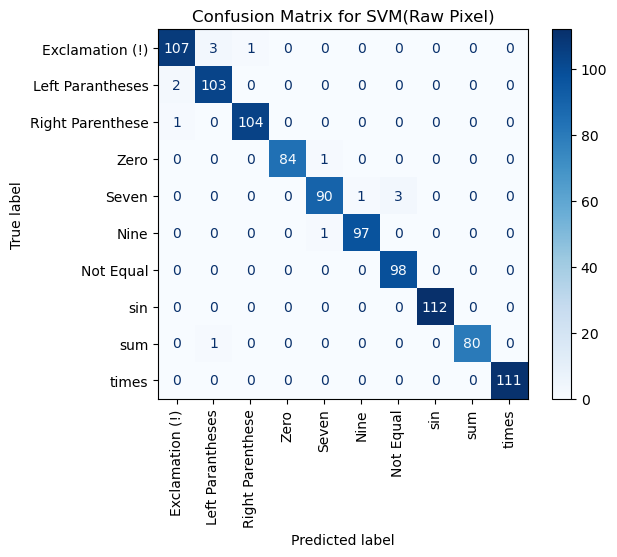

In [39]:
confusion_matrix = confusion_matrix(y_test, y_pred)
plot_confusionMatrix(confusion_matrix, label_map, 'Confusion Matrix for SVM(Raw Pixel)')

### Visualising Missclassifications

We will visualise the misclassified classes againts their true labels 

In [22]:
def visualise_misclassified_photos(images, y_pred, y_test,X_test, label_map,num_rows,num_cols):
    misclassified_indices = np.where(y_test!=y_pred)[0]
    predicted_labels = [label_map[y_pred[i]] for i in misclassified_indices]
    True_labels = [label_map[y_test[i]] for i in misclassified_indices]
    True_Photos = [X_test[i] for i in misclassified_indices]

    comparision = zip(predicted_labels, True_labels, True_Photos)


    fig,axs = plt.subplots(num_rows,num_cols, figsize=(12,10))
    axs = axs.flatten() # flatten into a 1D array

    for idx, (predicted_label, true_label, True_Photo) in enumerate(comparision):
        #we want tp plot each photo with the title of each hoto being predicted label,true label
        axs[idx].imshow(True_Photo.reshape(64,64), cmap='gray')
        axs[idx].set_title(f"Pred: {predicted_label}\nTrue: {true_label}", fontsize=10)

        axs[idx].axis('off')

    plt.tight_layout()
    plt.show()

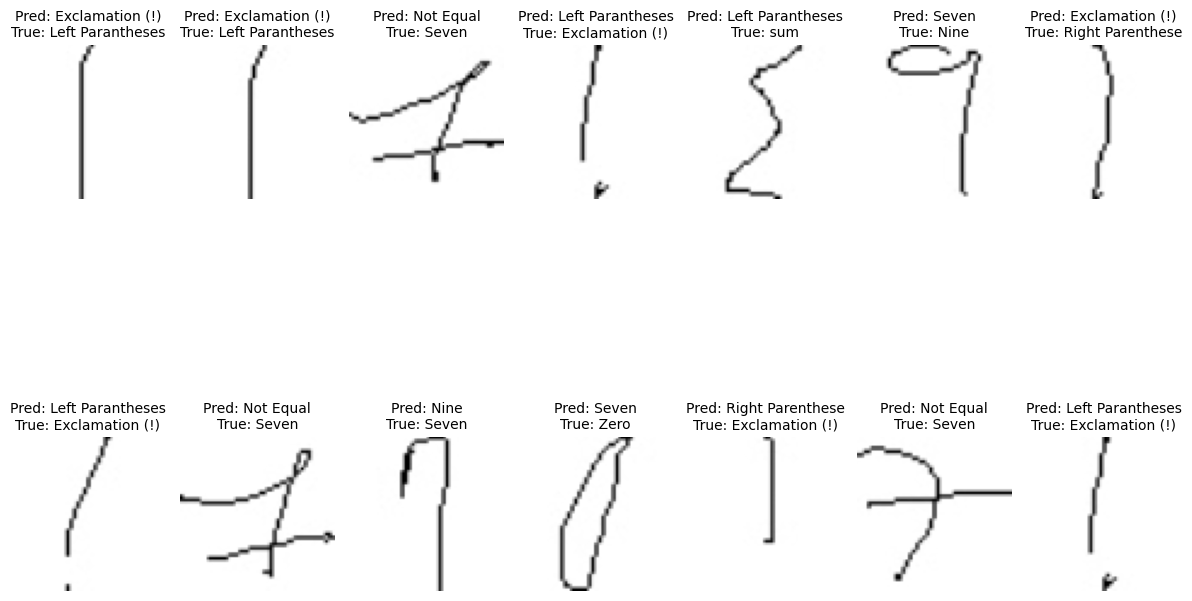

In [23]:
visualise_misclassified_photos(images, y_pred, y_test,X_test, label_map,2,7)

## Artificial Neural Network(ANN)

### Creating And Training The model

Add all necessary import statements

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


The model consists of one input layer, two hidden layers and finally an output layer with softmax as the activation function in order to handle the 10 different classes in the dataset. 
* The learning rate is set at 0.001 
* Batch Normalisation is aplied

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(512, input_shape=(4096,)),
    BatchNormalization(),
    Activation('relu'),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),

    Dense(10, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


c:\Users\61422\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,137,866 (8.16 MB)

 Trainable params: 2,136,586 (8.15 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [26]:
model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.7405 - loss: 1.0346 - val_accuracy: 0.0838 - val_loss: 93.1666
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9936 - loss: 0.1097 - val_accuracy: 0.0838 - val_loss: 53.2843
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9994 - loss: 0.0386 - val_accuracy: 0.0838 - val_loss: 38.9856
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9988 - loss: 0.0237 - val_accuracy: 0.0838 - val_loss: 20.3846
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 1.0000 - loss: 0.0142 - val_accuracy: 0.0862 - val_loss: 11.9213
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9997 - loss: 0.0094 - val_accuracy: 0.4462 - val_loss: 2.3527
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9993 - loss: 0.0093 - val_accuracy: 0.4225 - val_loss: 2.5146
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9997 - loss: 0.0073 - val_accuracy: 0.486

### Testing and Evaluating the model

In [27]:
predictions_prob = model.predict(X_test)
predictions_class = tf.argmax(predictions_prob, axis=1).numpy()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [28]:
result=np.argmax(predictions_prob,axis=1)

In [29]:
print("Classification Report:")
print(classification_report(y_test, predictions_class))

print("Accuracy:")
accuracy = accuracy_score(y_test, predictions_class)
print(accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       111
           1       0.97      1.00      0.99       105
           2       1.00      0.98      0.99       105
           3       1.00      0.96      0.98        85
           4       0.98      0.96      0.97        94
           5       0.98      0.99      0.98        98
           6       0.95      1.00      0.98        98
           7       0.98      0.98      0.98       112
           8       0.99      0.98      0.98        81
           9       0.99      0.99      0.99       111

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

Accuracy:
0.983


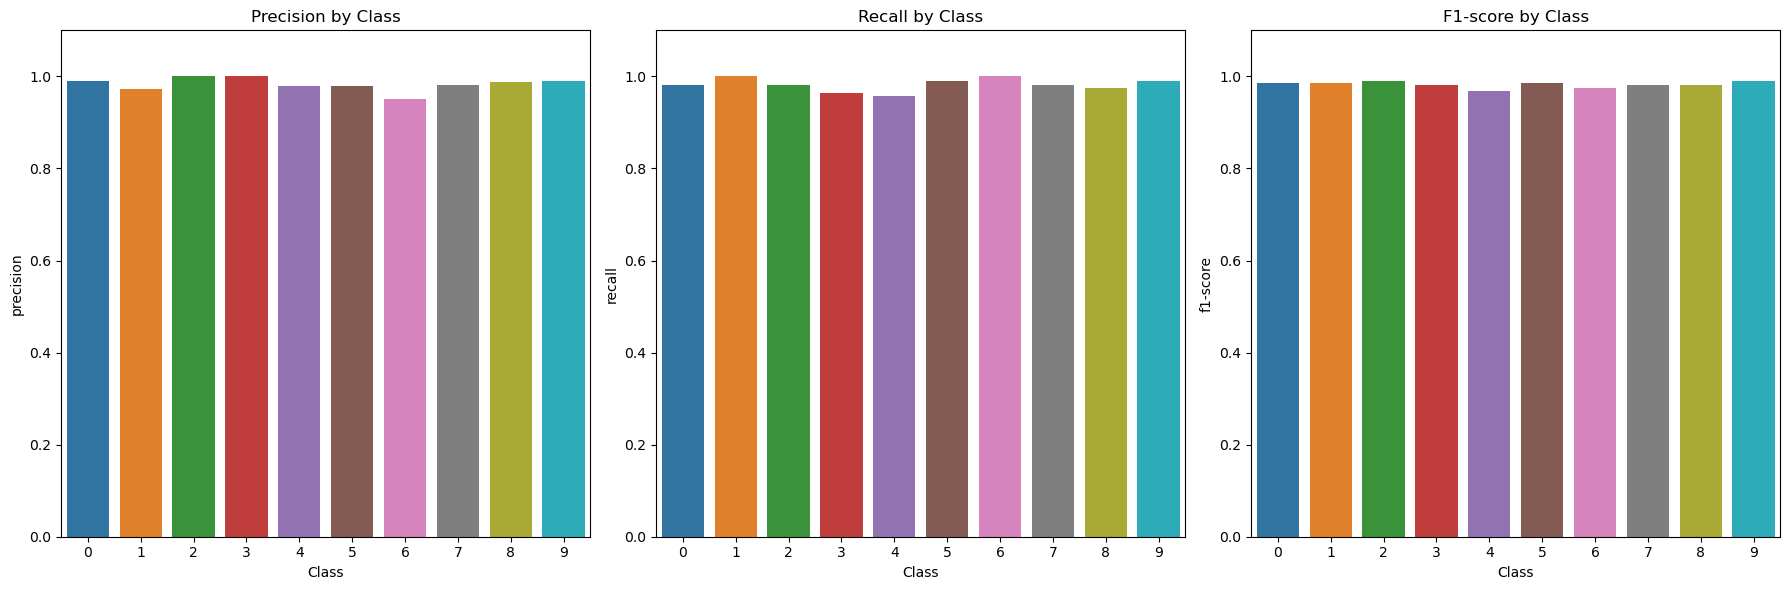

In [30]:
visualize_report(classification_report(y_test, predictions_class, output_dict=True))

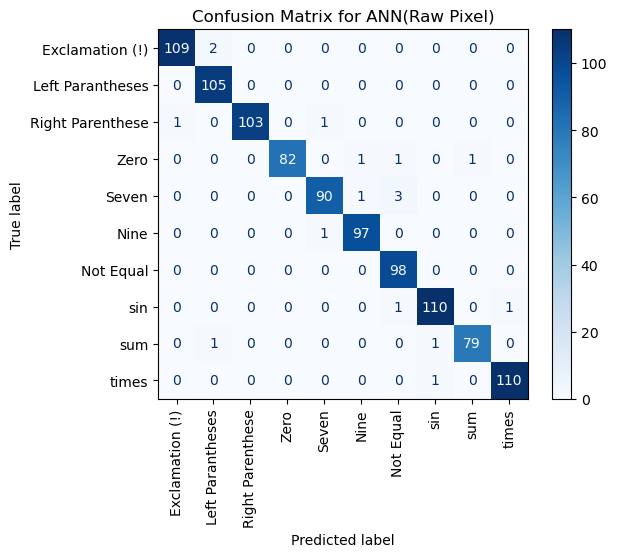

In [41]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions_class)

# Plot the confusion matrix
plot_confusionMatrix(cm, label_map, 'Confusion Matrix for ANN(Raw Pixel)')


### Visualising Missclassifications 

In [32]:
misclassified_indices = np.where(y_test!=predictions_class)[0]
print("The number of misclassified photos is ", misclassified_indices.shape)

The number of misclassified photos is  (17,)


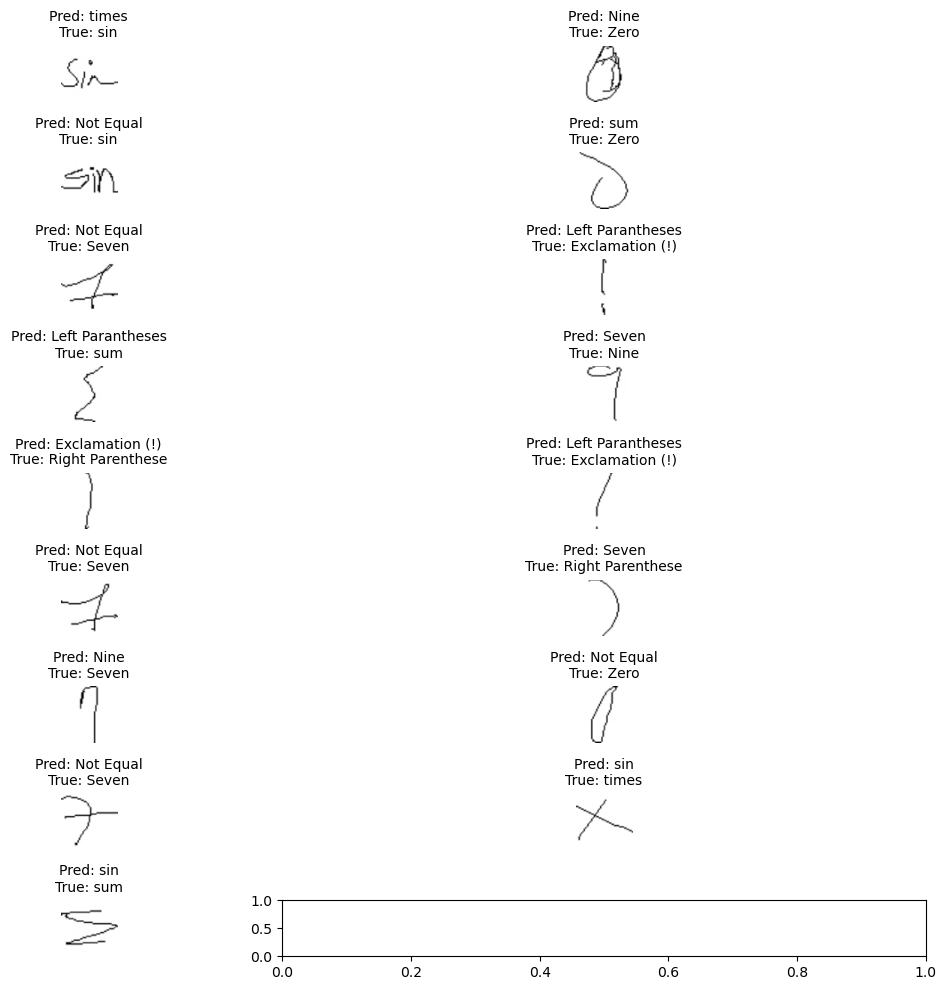

In [42]:
visualise_misclassified_photos(images, predictions_class,y_test,X_test,label_map,9,2)